In [181]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [182]:
plt.rcParams['font.sans-serif'] = ['SimHei']   #显示中文
plt.rcParams['axes.unicode_minus']=False       #显示负号

In [183]:
data_ = pd.read_csv('./车系总销量表.csv',names=['年','月','销量'])

历史步长与预测长度

In [184]:
look_back = 10

归一化

In [185]:
from sklearn.preprocessing import MinMaxScaler

In [186]:
scaler=MinMaxScaler((0,1))

In [187]:
data=scaler.fit_transform(data_.values)

划分数据集

In [188]:
train_data=data[:int(len(data_)*0.8),:]
test_data=data[int(len(data_)*0.8):,:]

滑动窗口函数

In [189]:
def split_sequence(sequence, look_back):
    X, y = [], []
    for i in range(len(sequence)):
        end_element_index = i + look_back
        if end_element_index > len(sequence) - 1: #序列中最后一个元素的索引
            break
        sequence_x, sequence_y = sequence[i:end_element_index], sequence[end_element_index] # 取最后一个元素作为预测值y
        X.append(sequence_x)
        y.append(sequence_y)

    return np.array(X), np.array(y)

样本生成

In [190]:
train_x,train_y=split_sequence(train_data,look_back)

In [191]:
train_y = train_y[:,-1]

模型建立

In [192]:
from keras.models import Model
from keras.layers import GRU, Dense,Input,Dropout,Input
from keras.optimizers import  Adam

In [193]:
N_TIMESTEPS=look_back
dim=3

In [194]:
inp=Input(shape=(N_TIMESTEPS, dim))
temp = Dense(16)(inp)
temp=GRU(32,activation='relu',return_sequences=False)(temp)
temp=Dropout(0.1)(temp)
temp=Dense(16)(temp)
out=Dense(1)(temp)

In [195]:
model=Model(inputs=[inp],outputs=[out])

In [196]:
model.summary()

Model: "functional_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_6 (InputLayer)      │ (None, 10, 3)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 10, 16)         │            64 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_6 (GRU)                     │ (None, 32)             │         4,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,409 (21.13 KB)

 Trainable params: 5,409 (21.13 KB)

 Non-trainable params: 0 (0.00 B)

In [197]:
model.compile(loss='mse',optimizer=Adam(0.001),metrics=['mae'])

In [198]:
train_x.shape

(158, 10, 3)

In [199]:
history=model.fit(train_x,train_y,epochs=50,verbose=2,validation_split=0.05,batch_size=32)

Epoch 1/50
5/5 - 2s - 479ms/step - loss: 0.3013 - mae: 0.5144 - val_loss: 0.1836 - val_mae: 0.4140
Epoch 2/50
5/5 - 0s - 12ms/step - loss: 0.1430 - mae: 0.3418 - val_loss: 0.0279 - val_mae: 0.1389
Epoch 3/50
5/5 - 0s - 12ms/step - loss: 0.0420 - mae: 0.1559 - val_loss: 0.0252 - val_mae: 0.1373
Epoch 4/50
5/5 - 0s - 13ms/step - loss: 0.0346 - mae: 0.1467 - val_loss: 0.0738 - val_mae: 0.2624
Epoch 5/50
5/5 - 0s - 13ms/step - loss: 0.0481 - mae: 0.1719 - val_loss: 0.0415 - val_mae: 0.1930
Epoch 6/50
5/5 - 0s - 13ms/step - loss: 0.0385 - mae: 0.1491 - val_loss: 0.0090 - val_mae: 0.0819
Epoch 7/50
5/5 - 0s - 13ms/step - loss: 0.0305 - mae: 0.1290 - val_loss: 0.0043 - val_mae: 0.0588
Epoch 8/50
5/5 - 0s - 13ms/step - loss: 0.0351 - mae: 0.1445 - val_loss: 0.0051 - val_mae: 0.0609
Epoch 9/50
5/5 - 0s - 12ms/step - loss: 0.0323 - mae: 0.1356 - val_loss: 0.0046 - val_mae: 0.0613
Epoch 10/50
5/5 - 0s - 13ms/step - loss: 0.0265 - mae: 0.1235 - val_loss: 0.0073 - val_mae: 0.0722
Epoch 11/50
5/5 - 

In [200]:
import matplotlib.pyplot as plt

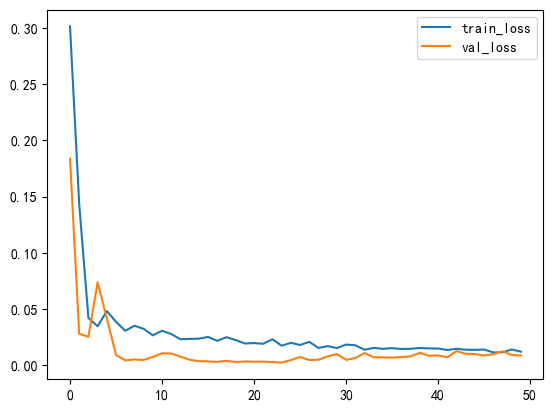

In [201]:
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

测试

In [202]:
test_x,test_y=split_sequence(test_data,look_back)
test_y = test_y[:,-1]

In [203]:
preds=model.predict(test_x)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 162ms/step


In [204]:
# 预测值
predictions=preds*(scaler.data_max_[-1] - scaler.data_min_[-1]) + scaler.data_min_[-1]
# 实际值
reals=test_y*(scaler.data_max_[-1] - scaler.data_min_[-1]) + scaler.data_min_[-1]
y_test, y_pred = reals, predictions

反归一化

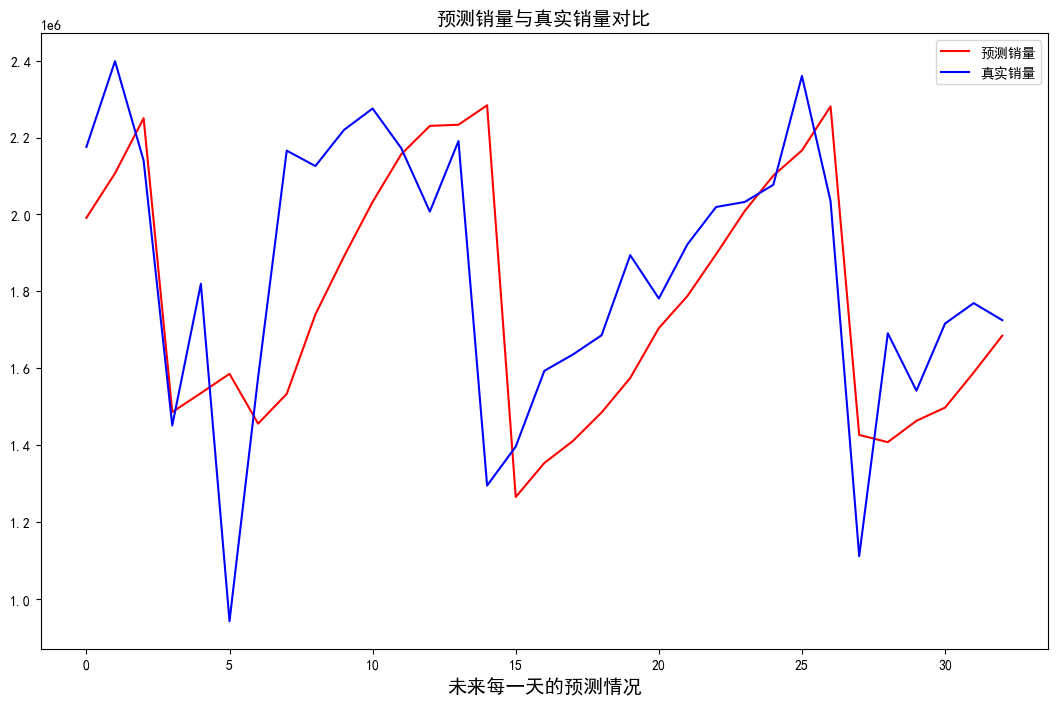

In [205]:
plt.figure(figsize=(13,8))
plt.plot(predictions,color='red',label='预测销量')
plt.plot(reals,color='blue',label='真实销量')
plt.title('预测销量与真实销量对比',fontsize=14)
plt.xlabel('未来每一天的预测情况',fontsize=14)
plt.legend()

指标计算

In [206]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
print("R2:", r2_score(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

R2: 0.24703298739449853
MAE: 229786.12121212116
RMSE: 304531.6085651744


In [207]:
model.save("GRU_model.h5")